In [ ]:
#@title Import important library and mount data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix,roc_auc_score
# from sklearn.metrics import plot_confusion_matrix,roc_auc_score
# import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data_application_energy.csv')

T1- Temperature in kitchen area

T2- in living area

T3- laundry room

T4- office room

T5- bathroom

T6- outside the building

T7- ironing room


T8- teenager room

T9- parents room

T_out- Temp outside (Chievres weather station)

Pressure- station

Hg RH_out- Humidity station

wind speed- station

visibility- station

Tdewpoint- station

Appliances- Dependent variable



Two random variable(rv1 and rv2) have been included in the dataset for testing the regression models and to filter out non-predictive attributes.

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
df.shape

(19735, 29)

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Analysis of Temperature

In [ ]:
def correlation_function(x, temp_list):
  corr_dict={}
  # temp_list = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7', 'T8', 'T9', 'T_out']
  for temp in temp_list:
    pearsons_coefficient = np.corrcoef(df[x], df[temp])
    corr_dict[temp] = pearsons_coefficient[0][1]
  return corr_dict

In [ ]:
temp_list = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7', 'T8', 'T9', 'T_out']

In [ ]:
for temp in temp_list:
  print(correlation_function(temp, temp_list))

{'T1': 1.0, 'T2': 0.8368339903786058, 'T3': 0.892402285110565, 'T4': 0.877001062196937, 'T5': 0.8852468734266528, 'T6': 0.6547687304502635, 'T7': 0.8387050284258699, 'T8': 0.8254133081296008, 'T9': 0.8447766103101585, 'T_out': 0.6828459090771675}
{'T1': 0.8368339903786058, 'T2': 1.0, 'T3': 0.7352454692196128, 'T4': 0.7620660478538451, 'T5': 0.7205501889149319, 'T6': 0.8011860477351992, 'T7': 0.6636600890691892, 'T8': 0.5781908403181025, 'T9': 0.6755345941979675, 'T_out': 0.7922546032932198}
{'T1': 0.8924022851105649, 'T2': 0.7352454692196128, 'T3': 1.0, 'T4': 0.8527777303850502, 'T5': 0.8881689127749807, 'T6': 0.6868824798505874, 'T7': 0.8473741470985888, 'T8': 0.7952834949814179, 'T9': 0.9013235850825655, 'T_out': 0.6994171099841383}
{'T1': 0.8770010621969369, 'T2': 0.7620660478538451, 'T3': 0.8527777303850502, 'T4': 1.0, 'T5': 0.8718134776269206, 'T6': 0.6523496972069832, 'T7': 0.8777628824299675, 'T8': 0.7962558482817459, 'T9': 0.8894391511402547, 'T_out': 0.6634782621715474}
{'T1':

1. Temperature outside the building(T6) is highly related to temperature outside (T_out).
2. Temperaure in parent room(T9) is highly related with temperature in ironing room(T_7).
3. Temperaure in parent room(T9) is highly related with temperature in laundry room(T_3).
4. Temperaure in parent room(T9) is highly related with temperature in bathroom room(T_5)

Drop highly correlated columns, we further investigate relation among the columns. We still have related columns but we try some technique to manipuate the column.

In [ ]:
df = df.drop(['T6', 'T7', 'T3','T5'], axis = 1)

In [ ]:
df.shape

(19735, 25)

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,RH_3,T4,RH_4,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,39.242500,20.855335,39.026904,50.949283,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,3.254576,2.042884,4.341321,9.022034,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,28.766667,15.100000,27.660000,29.815000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,36.900000,19.530000,35.530000,45.400000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,38.530000,20.666667,38.400000,49.090000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,41.760000,22.100000,42.156667,53.663333,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,50.163333,26.200000,51.090000,96.321667,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Analysis of Relative Humidity

In [ ]:
# def correlationRH_function(x):
#   corrRH_dict={}
#   rh_list = ['RH_1', 'RH_2', 'RH_4', 'RH_5', 'RH_6', 'RH_9', 'RH_out']
#   for rh in rh_list:
#     pearsons_coefficient = np.corrcoef(df[x], df[rh])
#     corrRH_dict[rh] = pearsons_coefficient[0][1]
#   return corrRH_dict

In [ ]:
rh_list = ['RH_1', 'RH_2', 'RH_3' ,'RH_4', 'RH_5', 'RH_6', 'RH_7' , 'RH_8','RH_9', 'RH_out']

In [ ]:
for rh in rh_list:
  print(correlation_function(rh, rh_list))

{'RH_1': 1.0, 'RH_2': 0.7975354282391048, 'RH_3': 0.8446769227122988, 'RH_4': 0.8803585351891956, 'RH_5': 0.3032582510279145, 'RH_6': 0.24512617320765243, 'RH_7': 0.8011221265635937, 'RH_8': 0.736195902967596, 'RH_9': 0.7640012365082005, 'RH_out': 0.27412601315756285}
{'RH_1': 0.7975354282391048, 'RH_2': 0.9999999999999998, 'RH_3': 0.6783263814705316, 'RH_4': 0.7214351136814587, 'RH_5': 0.2502706821116, 'RH_6': 0.3899330244770444, 'RH_7': 0.6905843218396175, 'RH_8': 0.6797772143533455, 'RH_9': 0.6764668046133052, 'RH_out': 0.5849106033567837}
{'RH_1': 0.8446769227122988, 'RH_2': 0.6783263814705316, 'RH_3': 1.0, 'RH_4': 0.8989782902830763, 'RH_5': 0.3754221693824139, 'RH_6': 0.5149120824090617, 'RH_7': 0.8326849916935275, 'RH_8': 0.8288218976145392, 'RH_9': 0.8335379663954492, 'RH_out': 0.35619197420816084}
{'RH_1': 0.8803585351891955, 'RH_2': 0.7214351136814586, 'RH_3': 0.8989782902830763, 'RH_4': 1.0, 'RH_5': 0.35259096857189454, 'RH_6': 0.392177709703523, 'RH_7': 0.8943012488817834, 

RH_3, RH_7 and RH_8 are correlated with RH_4.
We will see the what we can do to these columns.

In [ ]:
df = df.drop(['RH_3', 'RH_7','RH_8'], axis=1)

In [ ]:
df.shape

(19735, 22)

# Relationship between temperature and relative humidity

We have explored relation among the various temperature and among relative humidity. After finding relation using Perason's coefficient, we have dropped highly related columns in temperature and RH columns. 

Now we are exploring realtion between dependent varible i.e., Appliances and temperature and relative humidity.

We find out that there is no considerable relation between them.
Means temperature and RH doesnot effect energy consumption.

In [ ]:
correlation_function('Appliances', ['T1', 'T2', 'T4', 'T8', 'T9', 'T_out'])

{'T1': 0.05544747185203627,
 'T2': 0.12007328289803097,
 'T4': 0.04028098301092856,
 'T8': 0.03957198109559449,
 'T9': 0.010010284644666276,
 'T_out': 0.09915465073995954}

In [ ]:
correlation_function('Appliances', ['RH_1', 'RH_2', 'RH_4', 'RH_5', 'RH_6', 'RH_9', 'RH_out'])

{'RH_1': 0.08603142531155082,
 'RH_2': -0.0604647600271188,
 'RH_4': 0.016965431418944937,
 'RH_5': 0.006954536262417981,
 'RH_6': -0.08317760704200426,
 'RH_9': -0.05146201134630324,
 'RH_out': -0.15228238090915108}

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T4',
       'RH_4', 'RH_5', 'RH_6', 'T8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
correlation_function('Appliances', ['lights', 'Appliances', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])

{'lights': 0.1972775602062427,
 'Appliances': 1.0,
 'Press_mm_hg': -0.03488482908163533,
 'Windspeed': 0.08712210591235842,
 'Visibility': 0.00023035785547232307,
 'Tdewpoint': 0.015353010487472693,
 'rv1': -0.011144917533634452,
 'rv2': -0.011144917533634452}

In [ ]:
correlation_function('Press_mm_hg', ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T4','RH_4', 'RH_5', 'RH_6', 'T8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg','RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])

{'Appliances': -0.03488482908163532,
 'lights': -0.010576423911595531,
 'T1': -0.1505744533887827,
 'RH_1': -0.2939568613605972,
 'T2': -0.13302829910230374,
 'RH_2': -0.25564603587143286,
 'T4': -0.07529188425769066,
 'RH_4': -0.25074753181481696,
 'RH_5': -0.11932743327077316,
 'RH_6': -0.06581418715696484,
 'T8': -0.16285462654161292,
 'T9': -0.1568276886253361,
 'RH_9': -0.1837393188508876,
 'T_out': -0.14324880601609197,
 'Press_mm_hg': 1.0,
 'RH_out': -0.09201651980392868,
 'Windspeed': -0.23503225756072751,
 'Visibility': 0.04031488540712389,
 'Tdewpoint': -0.24409765583138815,
 'rv1': 0.0006994628817896181,
 'rv2': 0.0006994628817896181}

In [ ]:
np.corrcoef(df['Press_mm_hg'], df['Appliances'])

array([[ 1.        , -0.03488483],
       [-0.03488483,  1.        ]])

In [ ]:
temp_list_new = ['T1', 'T2', 'T4', 'T8', 'T9', 'T_out']
rh_list_new = ['RH_1', 'RH_2', 'RH_4', 'RH_5', 'RH_6', 'RH_9', 'RH_out']
for rh in rh_list_new:
  print(correlation_function(rh, temp_list_new))

{'T1': 0.16400578895210455, 'T2': 0.2698392449330159, 'T4': 0.10617954423516686, 'T8': -0.03005303208400837, 'T9': 0.11526335007979518, 'T_out': 0.34076660396731473}
{'T1': -0.00250884877303152, 'T2': -0.16561004190970838, 'T4': -0.04730409819413714, 'T8': -0.04102325271038191, 'T9': 0.05454442661459314, 'T_out': 0.03367421919752835}
{'T1': 0.09786123679312209, 'T2': 0.23156287197886297, 'T4': -0.04865036334245138, 'T8': -0.16706634632280182, 'T9': -0.04451758361978296, 'T_out': 0.29328899048822754}
{'T1': -0.014781878118270185, 'T2': 0.0295952029261785, 'T4': -0.07648930117178218, 'T8': -0.08699060699823341, 'T9': -0.13850897330423537, 'T_out': -0.05312594464216764}
{'T1': -0.6150449384003379, 'T2': -0.5803718048873672, 'T4': -0.7031486012583764, 'T8': -0.6658689553132047, 'T9': -0.738940212294918, 'T_out': -0.6415720144018144}
{'T1': 0.07175560763940855, 'T2': 0.15734630512768677, 'T4': -0.02554899442181783, 'T8': -0.15682002883909468, 'T9': -0.008683394446376747, 'T_out': 0.22326952

RH_6 ke sath thoda realtion dikha rha h negatively




In [ ]:
for rh in temp_list_new:
  print(correlation_function(rh, rh_list_new))

{'RH_1': 0.16400578895210455, 'RH_2': -0.00250884877303152, 'RH_4': 0.0978612367931221, 'RH_5': -0.014781878118270185, 'RH_6': -0.6150449384003379, 'RH_9': 0.07175560763940855, 'RH_out': -0.34548147751516245}
{'RH_1': 0.2698392449330159, 'RH_2': -0.16561004190970838, 'RH_4': 0.231562871978863, 'RH_5': 0.029595202926178503, 'RH_6': -0.5803718048873672, 'RH_9': 0.15734630512768677, 'RH_out': -0.5052908239489761}
{'RH_1': 0.10617954423516686, 'RH_2': -0.04730409819413714, 'RH_4': -0.04865036334245139, 'RH_5': -0.0764893011717822, 'RH_6': -0.7031486012583764, 'RH_9': -0.02554899442181783, 'RH_out': -0.3886024079639916}
{'RH_1': -0.030053032084008367, 'RH_2': -0.04102325271038191, 'RH_4': -0.16706634632280185, 'RH_5': -0.08699060699823341, 'RH_6': -0.6658689553132047, 'RH_9': -0.15682002883909468, 'RH_out': -0.3004375415718054}
{'RH_1': 0.11526335007979518, 'RH_2': 0.05454442661459314, 'RH_4': -0.04451758361978296, 'RH_5': -0.13850897330423534, 'RH_6': -0.738940212294918, 'RH_9': -0.0086833

# Calculate VIF score

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
df_inde_var = df.drop(['date','Appliances'], axis = 1)

In [ ]:
X = df_inde_var
calc_vif(X)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,lights,1.510020
1,T1,2607.302545
2,RH_1,1496.663075
3,T2,2153.186069
4,RH_2,2092.661789
5,T4,915.919567
6,RH_4,1127.931471
7,RH_5,41.074735
8,RH_6,33.717027
9,T8,826.619844


Press_mm_hg is related with 'visibility', temperatures and RH.
VIF value of RH_5 and RH_6 is low, compare with other RH's features.

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T4',
       'RH_4', 'RH_5', 'RH_6', 'T8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2',
       'ave_temp', 'ave_rh'],
      dtype='object')

In [ ]:
df['ave_temp'] = df[['T1', 'T2', 'T4', 'T8', 'T9', 'T_out']].mean(axis=1)

In [ ]:
df['ave_rh'] = df[['RH_1', 'RH_2', 'RH_4', 'RH_5', 'RH_6', 'RH_9', 'RH_out']].mean(axis=1)

In [ ]:
df_d1 = df.drop(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T_out','RH_4', 'RH_5', 'RH_6', 'T8', 'T9', 'RH_9', 'RH_out'], axis =1)

In [ ]:
df_d1.columns

Index(['Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'ave_temp', 'ave_rh'],
      dtype='object')

In [ ]:
df_d1.shape

(19735, 10)

In [ ]:
df_inde_var = df_d1.drop(['Appliances', 'Press_mm_hg', 'ave_rh', 'ave_temp', 'Visibility'], axis = 1)

In [ ]:
X = df_inde_var
calc_vif(X)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,lights,1.257579
1,Windspeed,3.659838
2,Tdewpoint,2.190405
3,rv1,inf
4,rv2,inf
5,temp_rh,8.289595


In [ ]:
dfd2 = df_d1.drop(['Press_mm_hg', 'temp_rh', 'ave_rh', 'Visibility'], axis = 1)

In [ ]:
np.corrcoef(df_d1['temp_rh'], df_d1['Appliances'])

array([[ 1.        , -0.03886741],
       [-0.03886741,  1.        ]])

The relation between humidity and temperature is inversely proportional. If temperature increases, it will reduce relative humidity; thus, the air will become drier. When the temperature decreases, the air will become wetter; therefore, the relative humidity will increase.


In [ ]:
df_d1['temp_rh'] = df_d1['ave_temp']*df_d1['ave_rh']

In [ ]:
df_d1.describe()

,Appliances,lights,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1,rv2,ave_temp,ave_rh,temp_rh
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,755.522602,4.039752,38.330834,3.760707,24.988033,24.988033,18.634954,49.509750,913.264071
std,102.524891,7.935988,7.399441,2.451221,11.794719,4.194648,14.496634,14.496634,2.221450,7.844194,131.567767
min,10.000000,0.000000,729.300000,0.000000,1.000000,-6.600000,0.005322,0.005322,13.558333,26.360816,549.447282
25%,50.000000,0.000000,750.933333,2.000000,29.000000,0.900000,12.497889,12.497889,17.091250,44.042667,819.341073
50%,60.000000,0.000000,756.100000,3.666667,40.000000,3.433333,24.897653,24.897653,18.333056,50.357143,902.540641
75%,100.000000,0.000000,760.933333,5.500000,40.000000,6.566667,37.583769,37.583769,19.891667,55.399167,999.868703
max,1080.000000,70.000000,772.300000,14.000000,66.000000,15.500000,49.996530,49.996530,25.422460,68.134286,1348.962699


In [ ]:
dfd2.columns

Index(['Appliances', 'lights', 'Windspeed', 'rv1', 'rv2', 'ave_temp'], dtype='object')

In [ ]:
corr_data = dfd2.corr()

<Axes: >

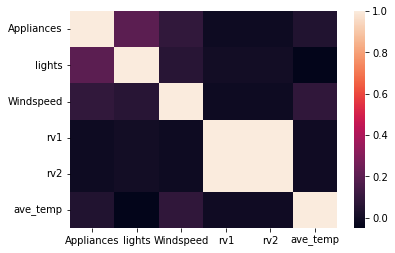

In [ ]:
sns.heatmap(corr_data)

In [ ]:
dfd2['ave_temp'] = df[['ave_temp', 'Tdewpoint']].mean(axis=1)

In [ ]:
dfd2 =dfd2.drop(['Tdewpoint'], axis =1 )

#Modelling

In [ ]:
X = df[['lights', 'Windspeed','ave_temp', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']]
y = df['Appliances']

## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state =10)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = reg.predict(X_test)


In [ ]:
print(r2_score(y_test, predictions))


0.05455549606001342


In [ ]:
mean_squared_error(y_test, predictions, squared = False)

99.76190107413724

In [ ]:
print('Coefficients: ', reg.coef_)

Coefficients:  [ 5.86400474 -1.24531611  2.64395195  0.33217295 -6.50250374 -0.59403309
  0.33217295  0.05561291  1.10719539]


In [ ]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.049532323819374224


In [ ]:
plt.style.use('fivethirtyeight')

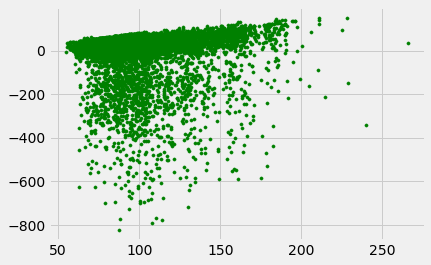

In [ ]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# What I have learned and correction

What we can learn from info method?
1. Datatype [date - time ko weekend and weekdays me convert kr skte h]
2. Number of independent variable and dependent variable
3. Number of missing values and null values

What we can learn from describe method?
1. Range of features-min and max value.


If continuous data then, firstly draw histogram and distplot. [See is there normal distribution or skewed]


If no column has a distribution like target varible appliances, then no feature independent with a linear relationship with the target.


Correlation heatmap is important, instead of individually. If feature T9 is related with other 4 features then remove only T9 feature not the other 4 features. Significantly correlation cases means above 0.9.




